In [15]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.manifold import TSNE

In [3]:
# Define relative paths
train_def_front_dir = '../data/casting_data/train/def_front'
train_ok_front_dir = '../data/casting_data/train/ok_front'


In [8]:
# Define a function to display images from a directory
def show_images_from_directory(directory, num_images=5):
    """Display a number of images from a specified directory.

    Args:
        directory (str): Path to the directory containing images.
        num_images (int): Number of images to display.
    """
    plt.figure(figsize=(15, 5))
    images = os.listdir(directory)
    for i, img_name in enumerate(images[:num_images]):
        img_path = os.path.join(directory, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.title(img_name)
            plt.axis('off')
    plt.show()


Defective Images:


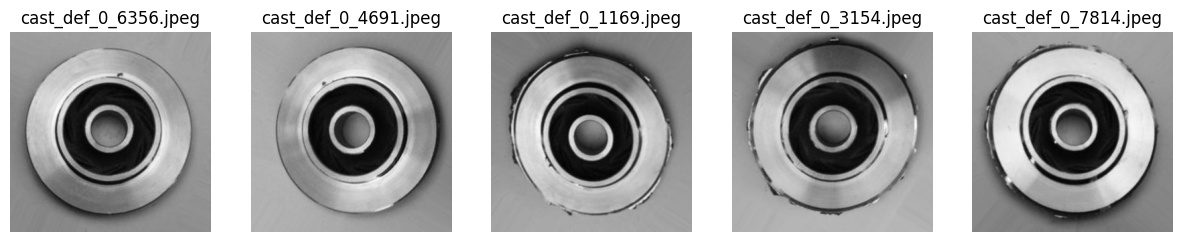

Normal Images:


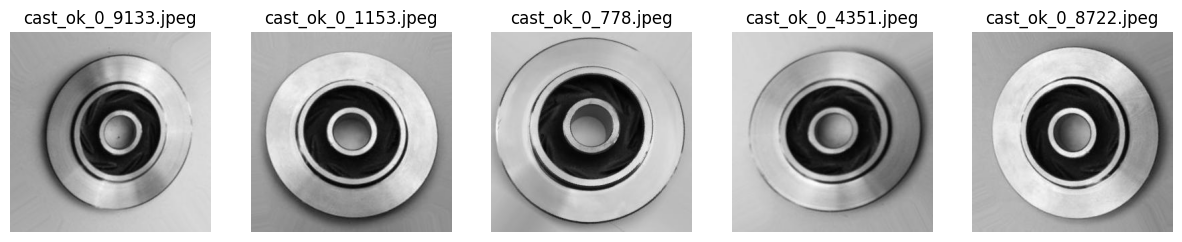

In [9]:
# Visualize defective images
print("Defective Images:")
show_images_from_directory(train_def_front_dir)

# Visualize normal images
print("Normal Images:")
show_images_from_directory(train_ok_front_dir)

In [10]:
#計算每個類別的圖像數量
def count_images(directory):
    """Count the number of images in each class directory.

    Args:
        directory (str): Path to the directory containing class subdirectories.

    Returns:
        dict: Dictionary with class names as keys and image counts as values.
    """
    counts = {}
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            counts[subdir] = len(os.listdir(subdir_path))
    return counts

# Count images in training data
train_counts = count_images('../data/casting_data/train')
test_counts = count_images('../data/casting_data/test')

print(f"Train Image Counts: {train_counts}")
print(f"Test Image Counts: {test_counts}")


Train Image Counts: {'ok_front': 2875, 'def_front': 3758}
Test Image Counts: {'ok_front': 262, 'def_front': 453}


In [11]:
#計算圖像的基本統計信息
import numpy as np

def calculate_image_statistics(directory):
    """Calculate mean and standard deviation of images in a directory.

    Args:
        directory (str): Path to the directory containing images.

    Returns:
        dict: Dictionary with class names as keys and (mean, std) tuples as values.
    """
    stats = {}
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            means = []
            stds = []
            for img_name in os.listdir(subdir_path):
                img_path = os.path.join(subdir_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    means.append(np.mean(img))
                    stds.append(np.std(img))
            stats[subdir] = (np.mean(means), np.mean(stds))
    return stats

# Calculate statistics for training data
train_stats = calculate_image_statistics('../data/casting_data/train')
test_stats = calculate_image_statistics('../data/casting_data/test')

print(f"Train Image Statistics: {train_stats}")
print(f"Test Image Statistics: {test_stats}")


Train Image Statistics: {'ok_front': (np.float64(149.8563449004831), np.float64(62.2945314470708)), 'def_front': (np.float64(139.30446528886523), np.float64(58.61039316388432))}
Test Image Statistics: {'ok_front': (np.float64(148.87914041560646), np.float64(61.98104795496235)), 'def_front': (np.float64(138.85239695854796), np.float64(58.28120393405829))}


Defective Image Histograms:


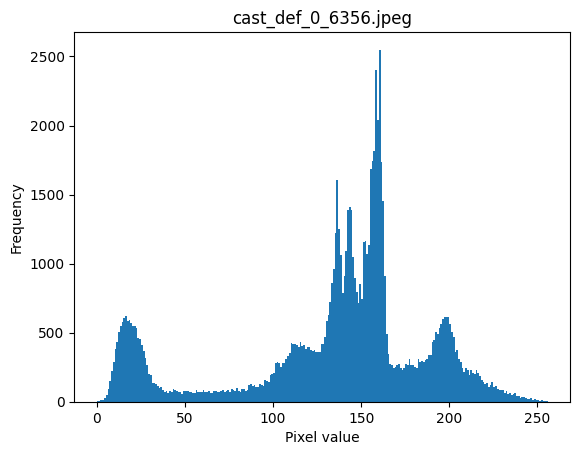

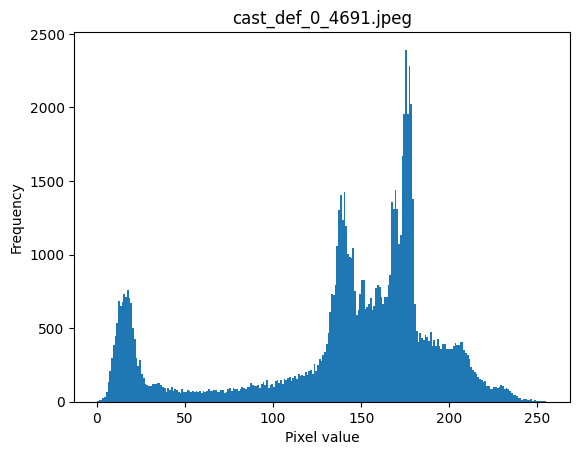

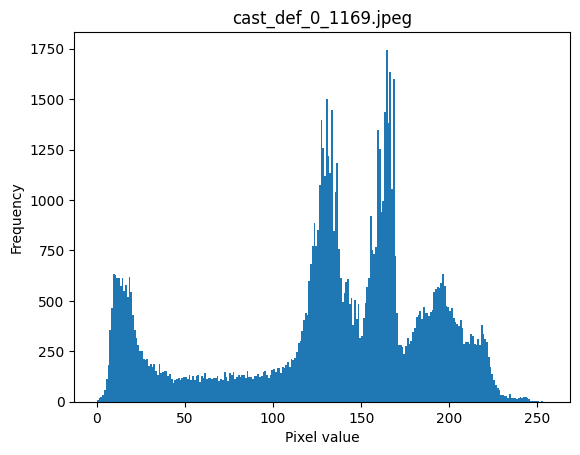

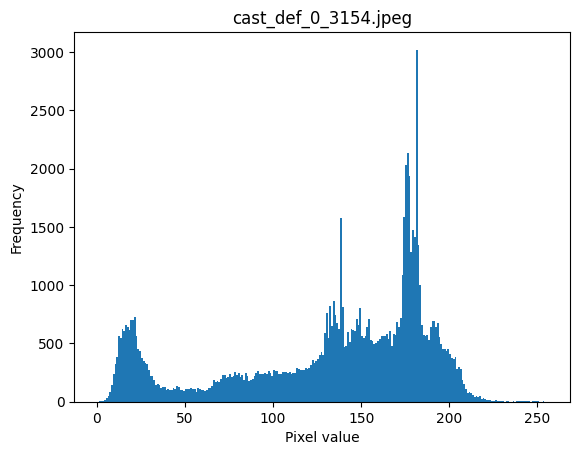

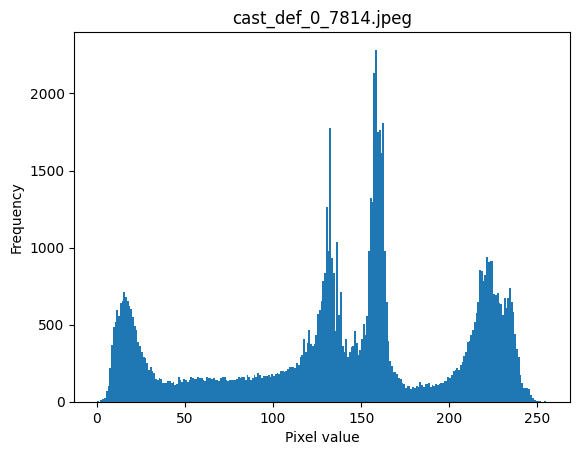

Normal Image Histograms:


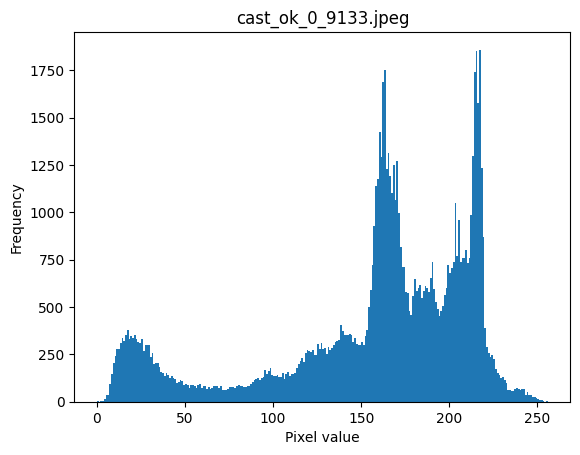

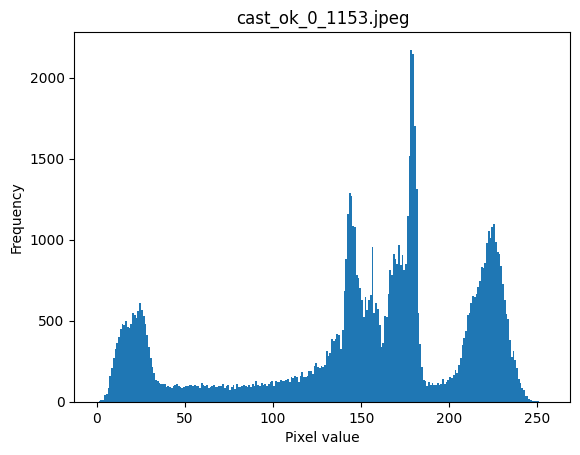

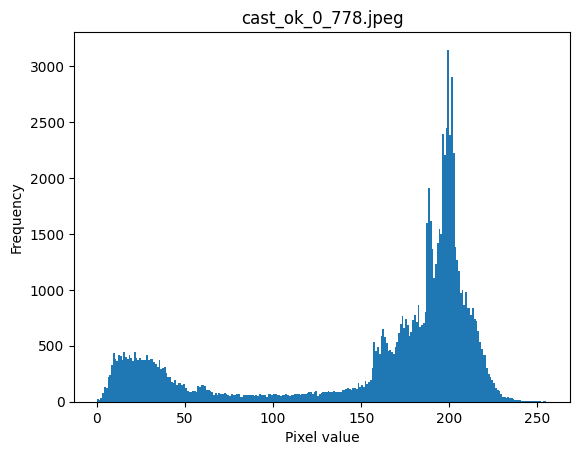

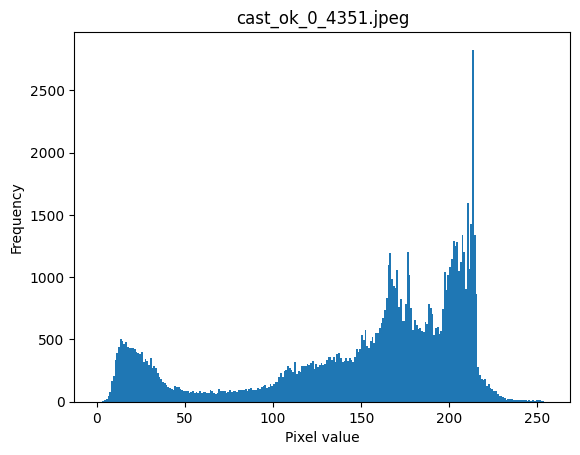

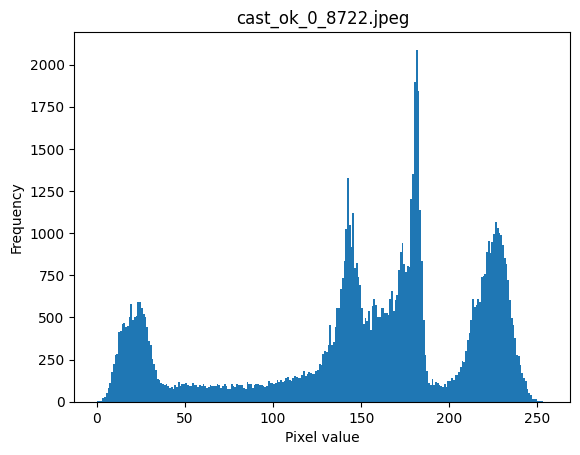

In [12]:
#顯示圖像的直方圖
def plot_histogram(image, title):
    """Plot the histogram of an image.

    Args:
        image (ndarray): Image array.
        title (str): Title for the plot.
    """
    plt.figure()
    plt.title(title)
    plt.xlabel("Pixel value")
    plt.ylabel("Frequency")
    plt.hist(image.ravel(), bins=256, range=(0, 256))
    plt.show()

# Display histograms for a few images
def plot_image_histograms(directory, num_images=5):
    """Plot histograms for a number of images from a specified directory.

    Args:
        directory (str): Path to the directory containing images.
        num_images (int): Number of images to plot histograms for.
    """
    images = os.listdir(directory)
    for img_name in images[:num_images]:
        img_path = os.path.join(directory, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            plot_histogram(img, title=img_name)

# Plot histograms for defective images
print("Defective Image Histograms:")
plot_image_histograms(train_def_front_dir)

# Plot histograms for normal images
print("Normal Image Histograms:")
plot_image_histograms(train_ok_front_dir)


Defective Grayscale Images:


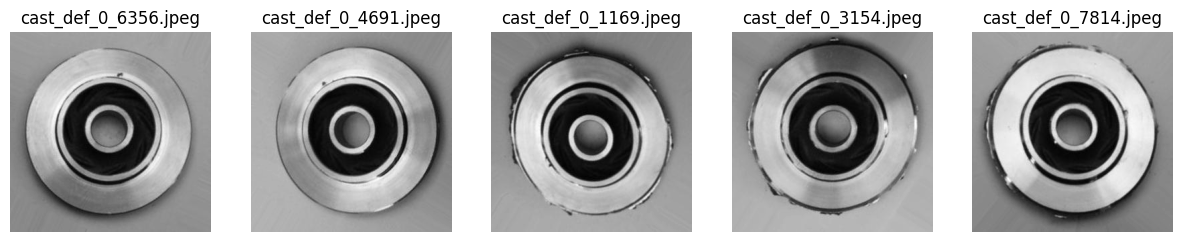

Normal Grayscale Images:


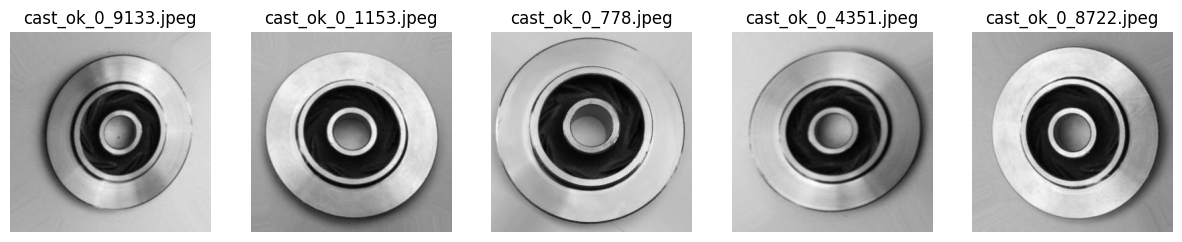

In [13]:
#顯示圖像的灰度轉換
def show_grayscale_images(directory, num_images=5):
    """Display a number of grayscale images from a specified directory.

    Args:
        directory (str): Path to the directory containing images.
        num_images (int): Number of images to display.
    """
    plt.figure(figsize=(15, 5))
    images = os.listdir(directory)
    for i, img_name in enumerate(images[:num_images]):
        img_path = os.path.join(directory, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(img_name)
            plt.axis('off')
    plt.show()

# Show grayscale defective images
print("Defective Grayscale Images:")
show_grayscale_images(train_def_front_dir)

# Show grayscale normal images
print("Normal Grayscale Images:")
show_grayscale_images(train_ok_front_dir)


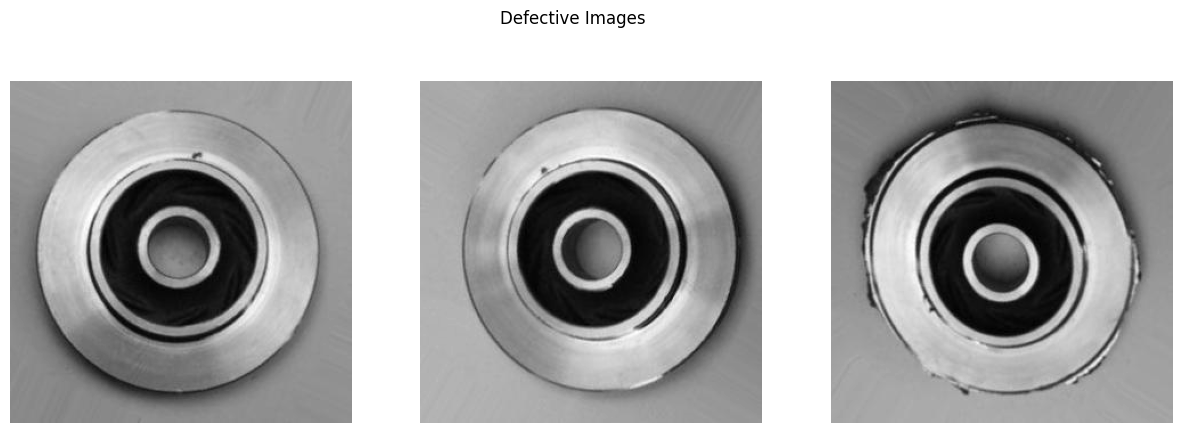

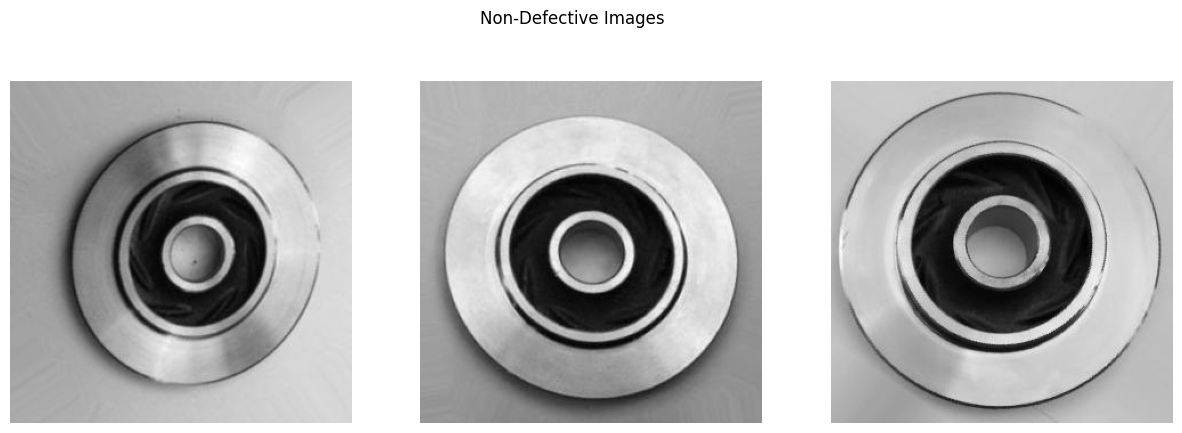

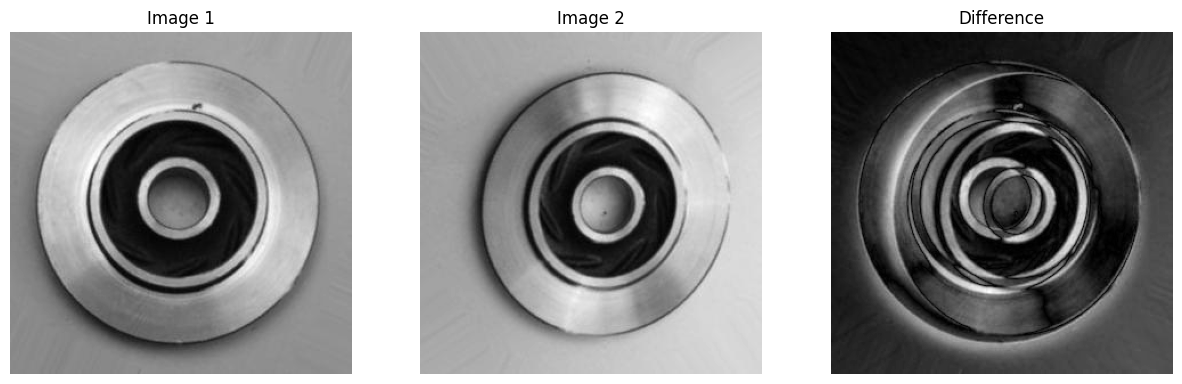

Defective Images - Mean pixel values: [np.float64(134.1414), np.float64(140.54306666666668), np.float64(132.70172222222223)]
Defective Images - Std Dev of pixel values: [np.float64(55.159504725800026), np.float64(56.7166402266174), np.float64(58.223025774750695)]
Defective Images - Min pixel values: [np.uint8(0), np.uint8(0), np.uint8(0)]
Defective Images - Max pixel values: [np.uint8(255), np.uint8(254), np.uint8(252)]
Non-Defective Images - Mean pixel values: [np.float64(156.09964444444444), np.float64(150.42728888888888), np.float64(157.15723333333332)]
Non-Defective Images - Std Dev of pixel values: [np.float64(58.95278509947338), np.float64(65.20134355964767), np.float64(66.28113658174382)]
Non-Defective Images - Min pixel values: [np.uint8(0), np.uint8(0), np.uint8(0)]
Non-Defective Images - Max pixel values: [np.uint8(255), np.uint8(253), np.uint8(254)]


In [14]:
# Load a few example images from each directory
def_images = [cv2.imread(os.path.join(train_def_front_dir, f), cv2.IMREAD_GRAYSCALE) 
              for f in os.listdir(train_def_front_dir)[:3]]
ok_images = [cv2.imread(os.path.join(train_ok_front_dir, f), cv2.IMREAD_GRAYSCALE) 
             for f in os.listdir(train_ok_front_dir)[:3]]

# Display multiple images in the same window
def display_images(images, title):
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

display_images(def_images, 'Defective Images')
display_images(ok_images, 'Non-Defective Images')

# Calculate and display the difference between a pair of defective and non-defective images
def compute_and_display_difference(img1, img2):
    difference = cv2.absdiff(img1, img2)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img1, cmap='gray')
    plt.title('Image 1')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(img2, cmap='gray')
    plt.title('Image 2')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(difference, cmap='gray')
    plt.title('Difference')
    plt.axis('off')
    plt.show()

compute_and_display_difference(def_images[0], ok_images[0])

# Perform statistical checks on pixel values
def compute_statistics(images, title):
    mean_values = [np.mean(img) for img in images]
    std_values = [np.std(img) for img in images]
    min_values = [np.min(img) for img in images]
    max_values = [np.max(img) for img in images]

    print(f"{title} - Mean pixel values: {mean_values}")
    print(f"{title} - Std Dev of pixel values: {std_values}")
    print(f"{title} - Min pixel values: {min_values}")
    print(f"{title} - Max pixel values: {max_values}")

compute_statistics(def_images, 'Defective Images')
compute_statistics(ok_images, 'Non-Defective Images')

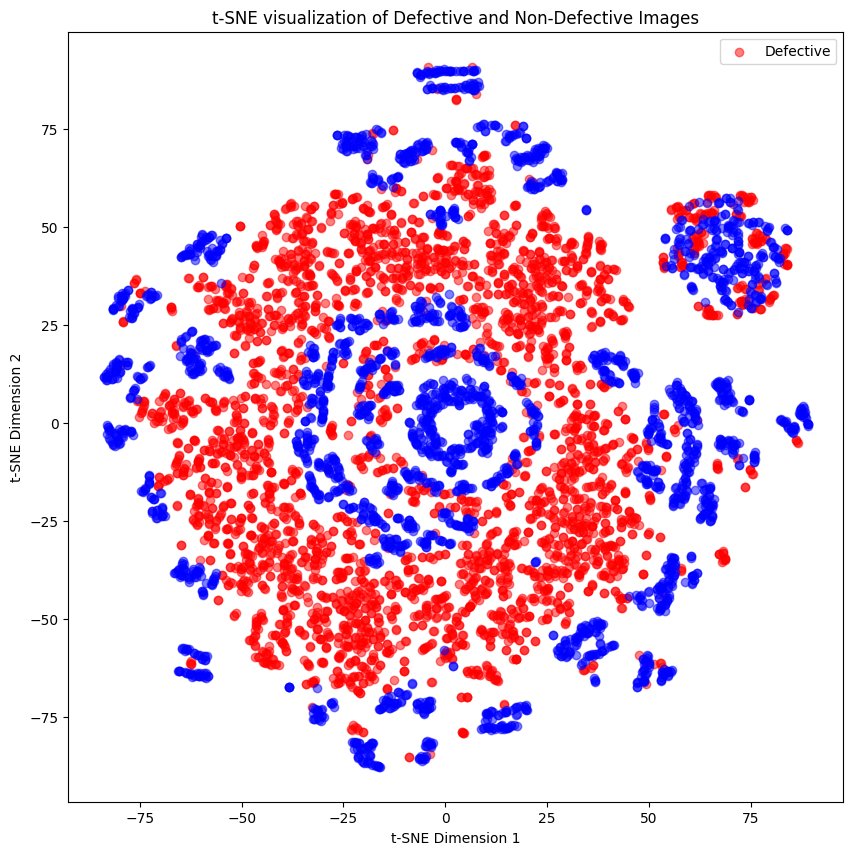

In [2]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.manifold import TSNE

# Define the relative paths for defective and non-defective images
train_def_front_dir = '../data/casting_data/train/def_front'
train_ok_front_dir = '../data/casting_data/train/ok_front'

# Load all images from each directory
def load_images_from_directory(directory):
    return [cv2.imread(os.path.join(directory, f), cv2.IMREAD_GRAYSCALE) for f in os.listdir(directory)]

def_images = load_images_from_directory(train_def_front_dir)
ok_images = load_images_from_directory(train_ok_front_dir)

# Flatten images for t-SNE
def flatten_images(images):
    return [img.flatten() for img in images]

# Combine defective and non-defective images
all_images = def_images + ok_images
labels = ['Defective'] * len(def_images) + ['Non-Defective'] * len(ok_images)

# Flatten the images
flattened_images = flatten_images(all_images)

# Convert list to NumPy array
flattened_images_np = np.array(flattened_images)

# Apply t-SNE with a smaller perplexity
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(flattened_images_np)

# Plot t-SNE results
plt.figure(figsize=(10, 10))
colors = {'Defective': 'red', 'Non-Defective': 'blue'}
for i, label in enumerate(labels):
    plt.scatter(tsne_results[i, 0], tsne_results[i, 1], c=colors[label], label=label if i == 0 else "", alpha=0.5)
plt.legend(loc='best')
plt.title('t-SNE visualization of Defective and Non-Defective Images')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


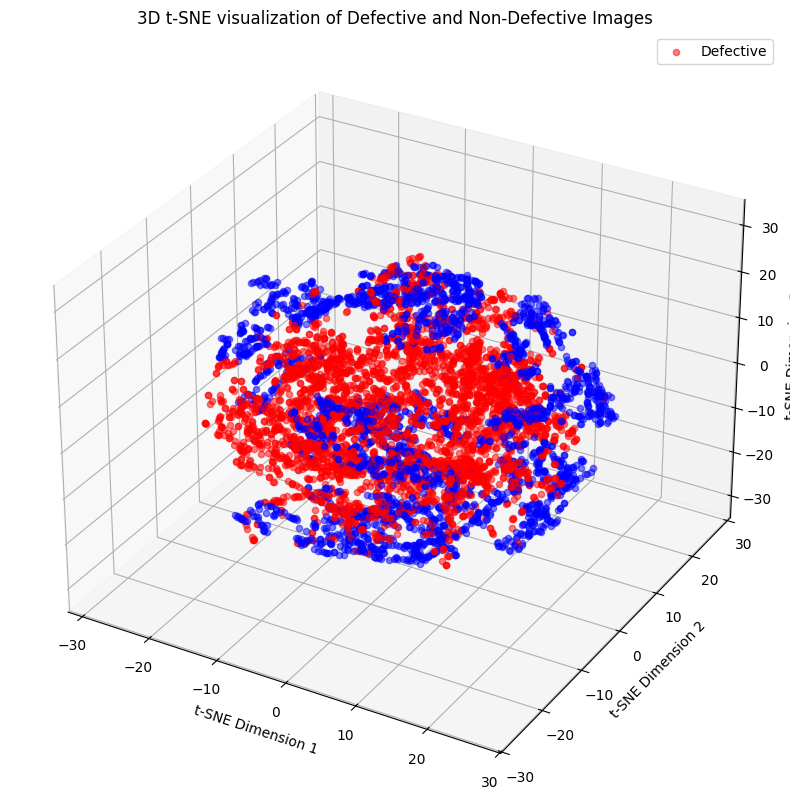

In [3]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

# Define the relative paths for defective and non-defective images
train_def_front_dir = '../data/casting_data/train/def_front'
train_ok_front_dir = '../data/casting_data/train/ok_front'

# Load all images from each directory
def load_images_from_directory(directory):
    return [cv2.imread(os.path.join(directory, f), cv2.IMREAD_GRAYSCALE) for f in os.listdir(directory) if f.endswith('.jpeg')]

def_images = load_images_from_directory(train_def_front_dir)
ok_images = load_images_from_directory(train_ok_front_dir)

# Flatten images for t-SNE
def flatten_images(images):
    return [img.flatten() for img in images]

# Combine defective and non-defective images
all_images = def_images + ok_images
labels = ['Defective'] * len(def_images) + ['Non-Defective'] * len(ok_images)

# Flatten the images
flattened_images = flatten_images(all_images)

# Convert list to NumPy array
flattened_images_np = np.array(flattened_images)

# Apply 3D t-SNE
tsne = TSNE(n_components=3, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(flattened_images_np)

# Plot 3D t-SNE results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
colors = {'Defective': 'red', 'Non-Defective': 'blue'}

for i, label in enumerate(labels):
    ax.scatter(tsne_results[i, 0], tsne_results[i, 1], tsne_results[i, 2], c=colors[label], label=label if i == 0 else "", alpha=0.5)

ax.set_title('3D t-SNE visualization of Defective and Non-Defective Images')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.legend(loc='best')
plt.show()


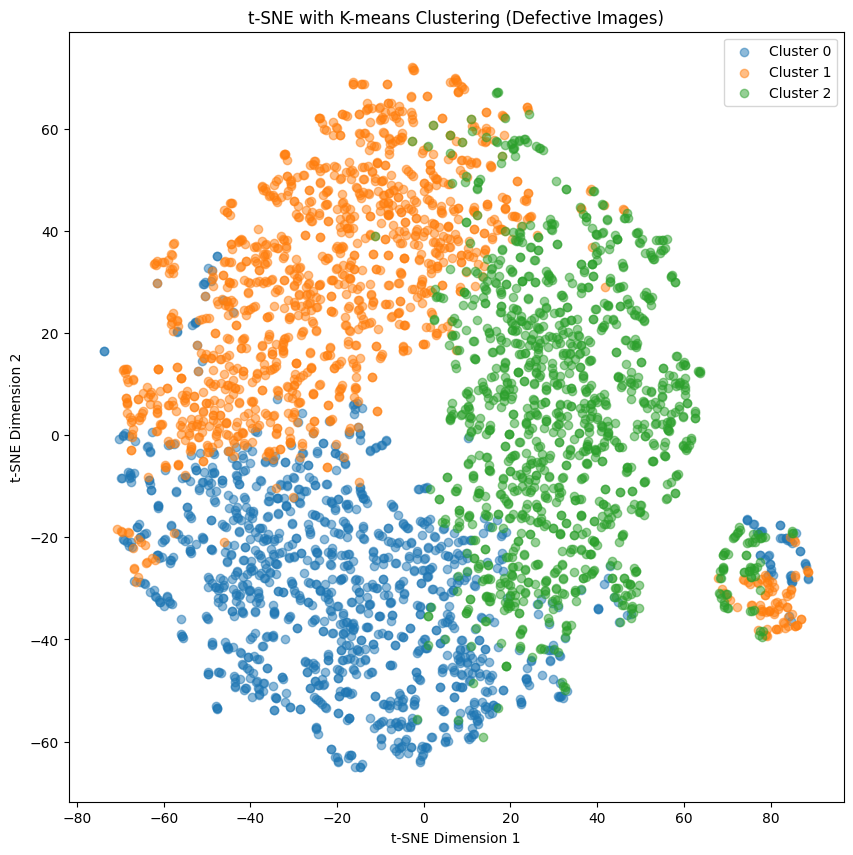

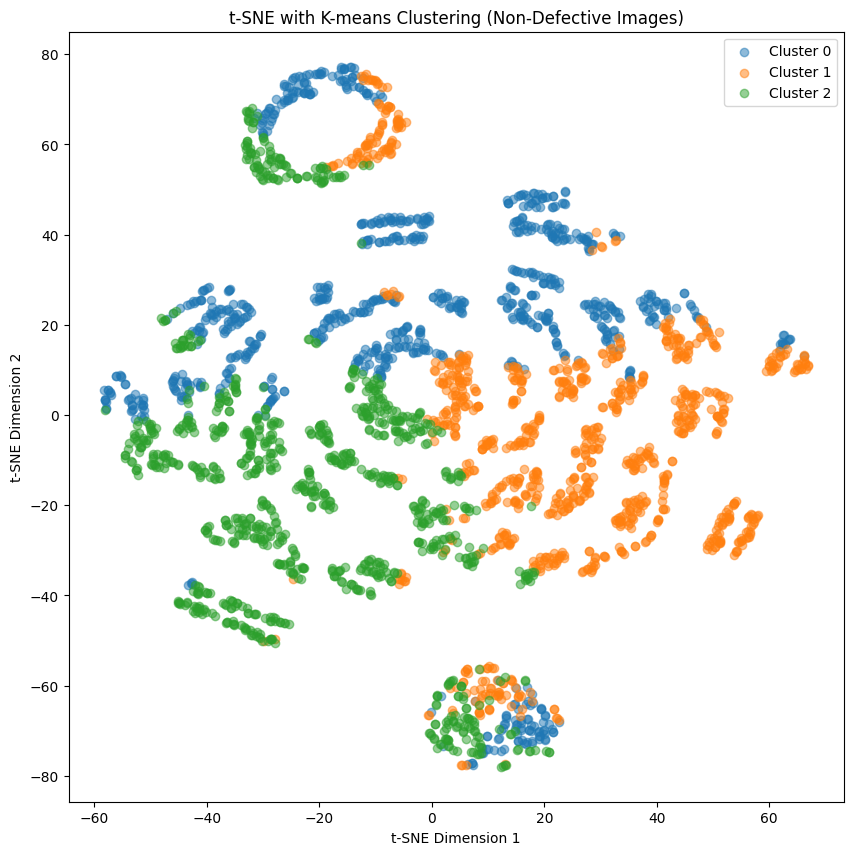

In [4]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Define the relative paths for defective and non-defective images
train_def_front_dir = '../data/casting_data/train/def_front'
train_ok_front_dir = '../data/casting_data/train/ok_front'

# Load all images from each directory
def load_images_from_directory(directory):
    return [cv2.imread(os.path.join(directory, f), cv2.IMREAD_GRAYSCALE) for f in os.listdir(directory) if f.endswith('.jpeg')]

def_images = load_images_from_directory(train_def_front_dir)
ok_images = load_images_from_directory(train_ok_front_dir)

# Flatten images for clustering
def flatten_images(images):
    return [img.flatten() for img in images]

# Flatten the images
def_flattened_images = flatten_images(def_images)
ok_flattened_images = flatten_images(ok_images)

# Convert lists to NumPy arrays
def_flattened_images_np = np.array(def_flattened_images)
ok_flattened_images_np = np.array(ok_flattened_images)

# Perform K-means clustering
def perform_kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    return kmeans.fit_predict(data)

# Determine the number of clusters for defective and non-defective images
n_clusters = 3  # You can adjust this based on your data

def_labels = perform_kmeans_clustering(def_flattened_images_np, n_clusters)
ok_labels = perform_kmeans_clustering(ok_flattened_images_np, n_clusters)

# Apply t-SNE for visualization
def apply_tsne(data):
    tsne = TSNE(n_components=2, random_state=42)
    return tsne.fit_transform(data)

def_tsne_results = apply_tsne(def_flattened_images_np)
ok_tsne_results = apply_tsne(ok_flattened_images_np)

# Plot t-SNE results with K-means clustering labels
def plot_tsne_with_clusters(tsne_results, labels, title):
    plt.figure(figsize=(10, 10))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        indices = labels == label
        plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=f'Cluster {label}', alpha=0.5)
    plt.legend(loc='best')
    plt.title(title)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.show()

plot_tsne_with_clusters(def_tsne_results, def_labels, 't-SNE with K-means Clustering (Defective Images)')
plot_tsne_with_clusters(ok_tsne_results, ok_labels, 't-SNE with K-means Clustering (Non-Defective Images)')


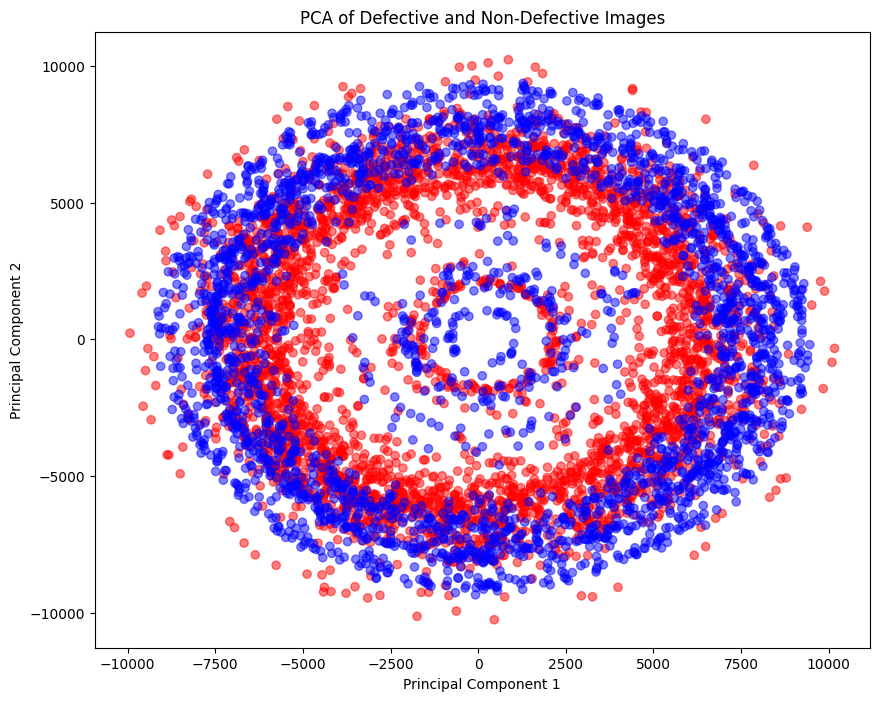

In [4]:
from sklearn.decomposition import PCA
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the relative paths for defective and non-defective images
train_def_front_dir = '../data/casting_data/train/def_front'
train_ok_front_dir = '../data/casting_data/train/ok_front'

# Load all images from each directory
def load_images_from_directory(directory):
    return [cv2.imread(os.path.join(directory, f), cv2.IMREAD_GRAYSCALE) for f in os.listdir(directory) if f.endswith('.jpeg')]

def_images = load_images_from_directory(train_def_front_dir)
ok_images = load_images_from_directory(train_ok_front_dir)


# Flatten images for PCA
def flatten_images(images):
    return [img.flatten() for img in images]

def_flattened_images = flatten_images(def_images)
ok_flattened_images = flatten_images(ok_images)

# Combine and label data
flattened_images = def_flattened_images + ok_flattened_images
labels = [0]*len(def_flattened_images) + [1]*len(ok_flattened_images)

# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(flattened_images)

# Plot PCA results
plt.figure(figsize=(10, 8))
colors = ['red' if label == 0 else 'blue' for label in labels]
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=colors, alpha=0.5)
plt.title('PCA of Defective and Non-Defective Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


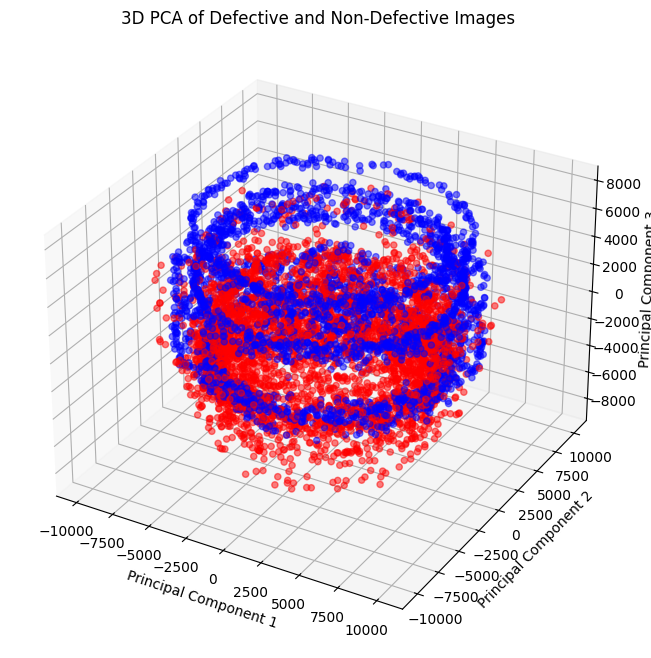

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Flatten images for PCA
def flatten_images(images):
    return [img.flatten() for img in images]

def_flattened_images = flatten_images(def_images)
ok_flattened_images = flatten_images(ok_images)

# Combine and label data
flattened_images = def_flattened_images + ok_flattened_images
labels = [0]*len(def_flattened_images) + [1]*len(ok_flattened_images)

# Apply PCA
pca = PCA(n_components=3)
pca_results = pca.fit_transform(flattened_images)

# Plot PCA results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['red' if label == 0 else 'blue' for label in labels]

scatter = ax.scatter(pca_results[:, 0], pca_results[:, 1], pca_results[:, 2], c=colors, alpha=0.5)
ax.set_title('3D PCA of Defective and Non-Defective Images')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


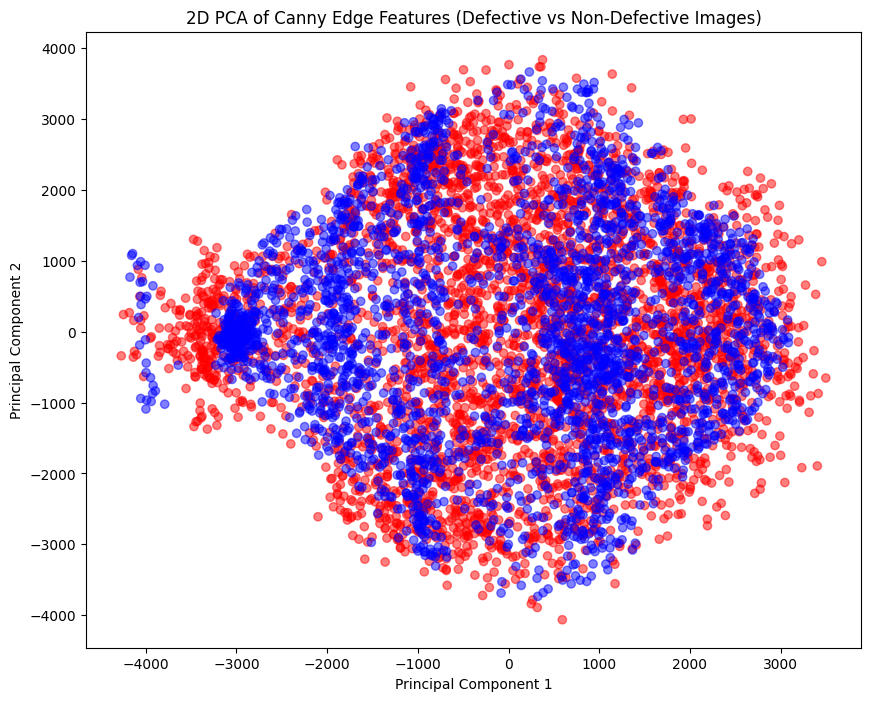

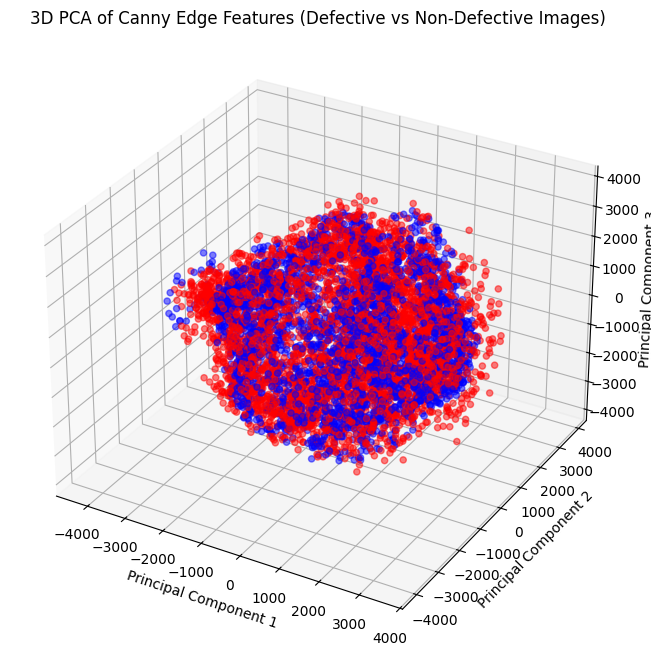

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import os

# Define the relative paths for defective and non-defective images
train_def_front_dir = '../data/casting_data/train/def_front'
train_ok_front_dir = '../data/casting_data/train/ok_front'

# Load all images from each directory
def load_images_from_directory(directory):
    return [cv2.imread(os.path.join(directory, f), cv2.IMREAD_GRAYSCALE) for f in os.listdir(directory) if f.endswith('.jpeg')]

def_images = load_images_from_directory(train_def_front_dir)
ok_images = load_images_from_directory(train_ok_front_dir)

# Apply Canny edge detection to images
def apply_canny_edge_detection(images):
    return [cv2.Canny(img, 100, 200) for img in images]

def_canny_images = apply_canny_edge_detection(def_images)
ok_canny_images = apply_canny_edge_detection(ok_images)

# Flatten images for PCA
def flatten_images(images):
    return [img.flatten() for img in images]

def_flattened_images = flatten_images(def_canny_images)
ok_flattened_images = flatten_images(ok_canny_images)

# Combine and label data
flattened_images = def_flattened_images + ok_flattened_images
labels = [0]*len(def_flattened_images) + [1]*len(ok_flattened_images)

# Apply PCA
pca = PCA(n_components=3)
pca_results = pca.fit_transform(flattened_images)

# Plot 2D PCA results
plt.figure(figsize=(10, 8))
colors = ['red' if label == 0 else 'blue' for label in labels]
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=colors, alpha=0.5)
plt.title('2D PCA of Canny Edge Features (Defective vs Non-Defective Images)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plot 3D PCA results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_results[:, 0], pca_results[:, 1], pca_results[:, 2], c=colors, alpha=0.5)
ax.set_title('3D PCA of Canny Edge Features (Defective vs Non-Defective Images)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()
